In [3]:
from typing import Dict,TypedDict,List
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str


In [13]:
def process_values(state : AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)

    state["result"] = f"Hii there {state['name']}  Your sum = {sum(state['values'])}"

    print(state)

    return state



In [14]:
graph = StateGraph(AgentState)
graph.add_node("Processor" , process_values)

graph.set_entry_point("Processor")
graph.set_finish_point("Processor")
app = graph.compile()

In [16]:
res = app.invoke({"values":[10,20] , "name":"ritika"})


{'values': [10, 20], 'name': 'ritika'}
{'values': [10, 20], 'name': 'ritika', 'result': 'Hii there ritika  Your sum = 30'}


In [12]:
res["result"]

'Hii there ritika  Your sum = 30'

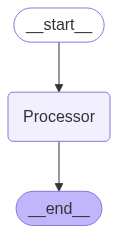

In [9]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
class AgentState(TypedDict):
    name : str
    values : List[int]
    operation : str
    result : str


In [ ]:
from functools import reduce
import operator

def processing(state:AgentState) -> AgentState:
    if state["operation"] == "+":
        state["result"] = f"HII {state['name']} , ur answer is : {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"HII {state['name']} , ur answer is : {reduce(operator.mul, state['values'], 1)}"


    print(state)

In [22]:
graph = StateGraph(AgentState)

graph.add_node("solver" , processing)

graph.set_entry_point("solver")
graph.set_finish_point("solver")

app = graph.compile()


In [24]:
res = app.invoke({"name" : "ritika" , "values":[10,20] , "operation":"*"})

{'name': 'ritika', 'values': [10, 20], 'operation': '*', 'result': 'HII ritika , ur answer is : 200'}
